In [8]:
from lmms_eval.models.llava_hf import LlavaHf

In [4]:
import os
import json
import numpy as np

# Initialize a 23x23 2D array with zeros
array = np.zeros((23, 23))

array.fill(0.34)

# Define the logs directory
logs_dir = '../logs'

# Iterate through the log files
for log_name in os.listdir(logs_dir):
    # Extract indices from the log file name
    parts = log_name.split('_')
    front_index = int(parts[-3])
    back_index = int(parts[-1])

    # Construct the path to the results.json file
    inner_dir = os.listdir(os.path.join(logs_dir, log_name))[0]
    results_path = os.path.join(logs_dir, log_name, inner_dir, 'results.json')

    # Read the results.json file
    with open(results_path, 'r') as file:
        data = json.load(file)
    
    # Extract the required value
    exact_match_value = data['results']['textvqa_val']['exact_match,none']

    # Populate the array
    array[front_index, back_index] = exact_match_value



In [5]:
# plot in a way where x axis is back_index and y axis is front_index
# the bottom left corner is (0, 0)
# the top right corner is (22, 22)

# save the array in a file
np.save('textvqa_all_layers.npy', array)

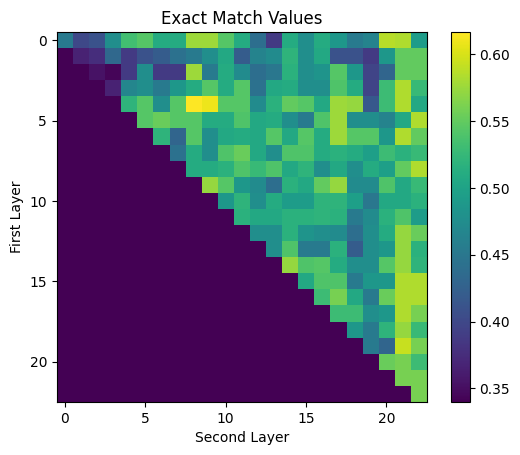

In [6]:
# create a 2D plot with the array where the x-axis and y-axis represent the front and back indices, respectively. The color of each cell in the plot will represent the exact match value. The following code snippet demonstrates how to create such a plot using the matplotlib library:

import matplotlib.pyplot as plt

plt.imshow(array)
plt.xlabel('Second Layer')
plt.ylabel('First Layer')
plt.title('Exact Match Values')
plt.colorbar()
plt.show()
